<a href="https://colab.research.google.com/github/danielcdo/-MachineLearning/blob/main/titanicLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression Model

**Dataset:** Titanic kaggle source - https://www.kaggle.com/c/titanic/overview

##Import Relevant Packages

In [40]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt


%matplotlib inline   

Function to load  the dataset into Pandas daframe stored at my GitHub repository.

In [42]:
def load_data(dataset_url, filename):
  ''' Replace github.com by raw.githubusercontent.com. Provide the URL for the raw dataset.'''
  return pd.read_csv(dataset_url + filename)
print('Defined load_data function.')

Defined load_data function.


Titanic dataset stored in GitHub. Provide the raw URL repository.

In [43]:
# Replace github.com by raw.githubusercontent.com
# provide the URL for the raw dataset
# original URL: https://github.com/danielcdo/-MachineLearning/tree/main/datasets/titanic

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/danielcdo/-MachineLearning/main/datasets/titanic/'

## Exploratory Data Analysis - EDA
## Quick glance at the data

***Details***: dataset already splitted in train and test

In [44]:
# call load_data function
train = load_data(dataset_url=DOWNLOAD_ROOT, filename='train.csv')

train.head()
#train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
train['Sex'].value_counts()
#train['Survived'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

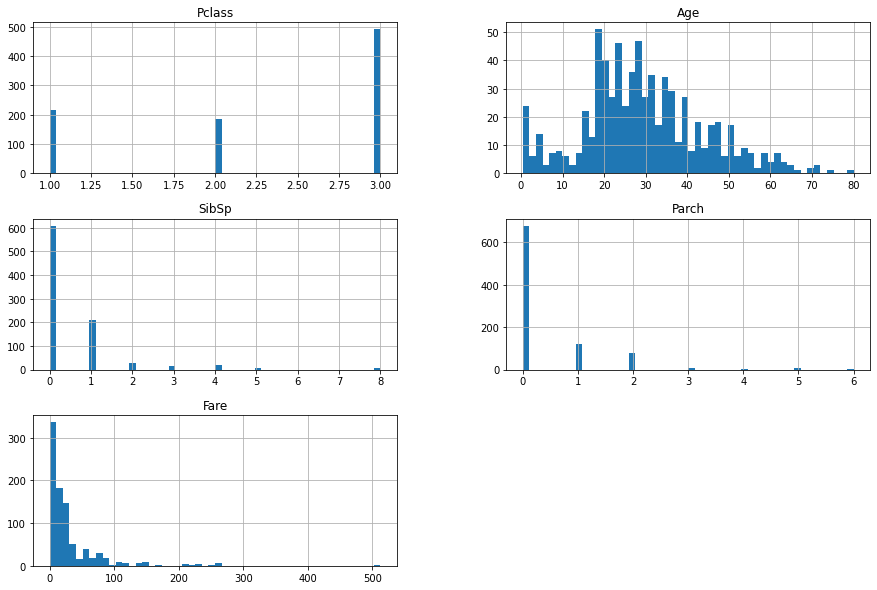

In [49]:
attributes=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
train[attributes].hist(bins=50, figsize=(15,10));



## Let's keep digging into the data and let's investigate any data correlation

In [51]:
train.corr()  # Pearson is the standard correlation coeficient 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Pandas **scatter_matrix** function checks the correlation between numerical attributes in a graphical way.

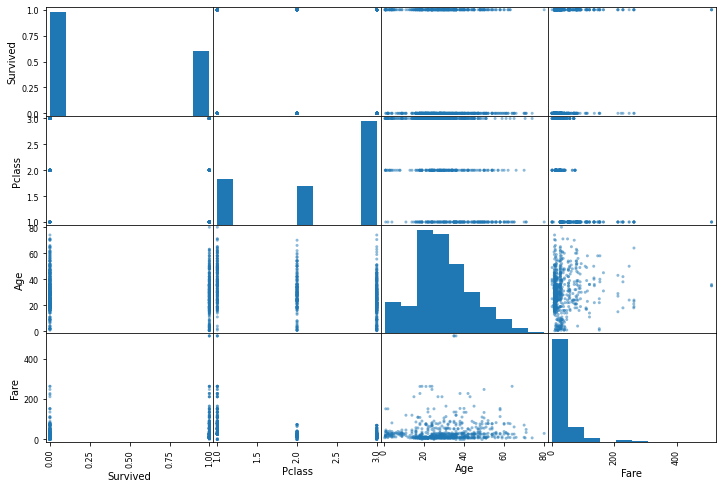

In [54]:
key_attributes=['Survived', 'Pclass', 'Age', 'Fare']
scatter_matrix(train[key_attributes], figsize=(12,8));

Hard to seem any correlation. Let's zoom in...

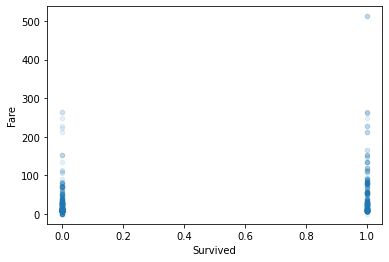

In [60]:
train.plot(kind='scatter', x='Survived', y='Fare', alpha=0.1);

# Can't find any correlation.
TODO: improve the EDA phase. Use feature engineering to create new features

#Data Cleansing
##Data prepocessing to load in the ML model

In [62]:
# get X feature dataset
X = train.drop('Survived', axis=1)

# get labels (targets) dataset
y = train['Survived'].copy()

In [63]:
print('Features dataset', len(X))
print('Labels dataset', len(y))

Features dataset 891
Labels dataset 891
